In [171]:
import pandas as pd #data analysis or to read data
from pandas.plotting import andrews_curves
import numpy as np #for numerical operations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris




In [172]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
# Load the dataset
iris_data = pd.read_csv(url, names=column_names)

In [173]:
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [174]:
type(iris_data)

pandas.core.frame.DataFrame

In [175]:
#iris_data.iloc[50:100] ->to get details from 50 to 100
iris_data.describe() #gives mean,median etc


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<function matplotlib.pyplot.show(close=None, block=None)>

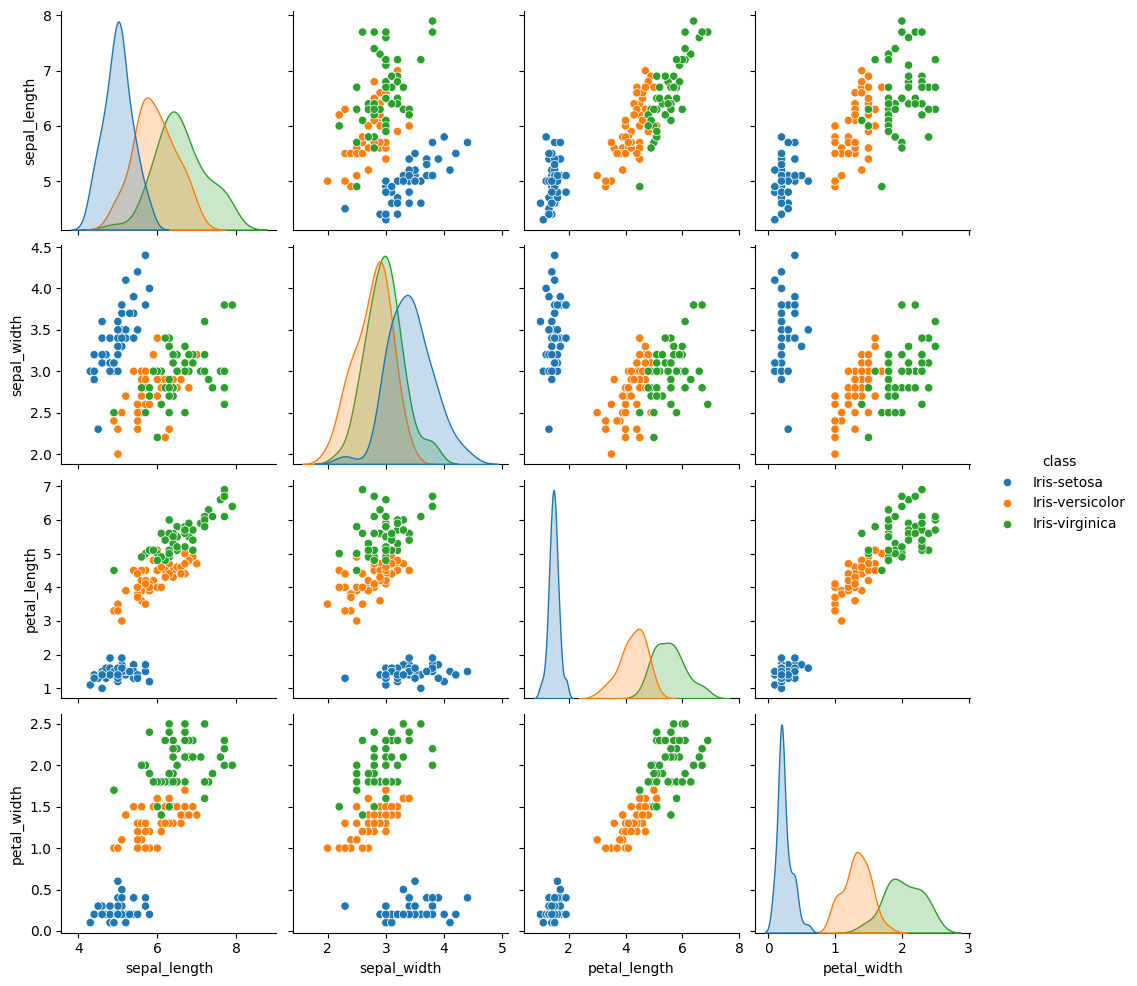

In [176]:
sns.pairplot(iris_data, hue="class") # hue is used to show colors here there are 3 types so 3 colors will be shown
plt.show # pairplot is used to show pairwise relationships in the dataset

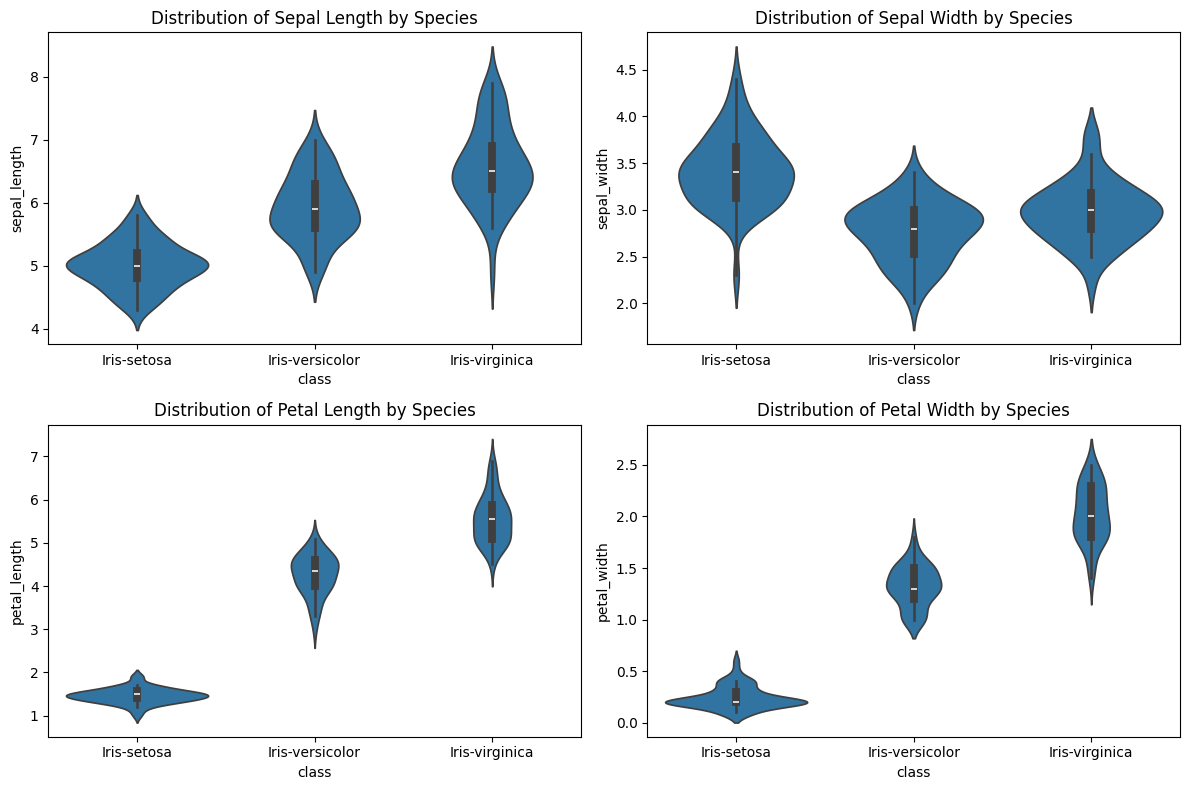

In [177]:
# Violin plots
plt.figure(figsize=(12, 8))# Create a new figure with a specific size (12 inches wide, 8 inches tall)
# Loop through the list of features (columns) one by one
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
     # Create a 2x2 grid of subplots and move to the (i+1)th subplot
    plt.subplot(2, 2, i+1)
     # Create a violin plot:
    # - x-axis shows species/classes
    # - y-axis shows the current feature (like sepal_length, etc.)
    # - data comes from iris_data DataFrame
    sns.violinplot(x='class', y=feature, data=iris_data)
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by Species')
# Adjusts spacing between subplots so they don’t overlap
plt.tight_layout()
plt.show()

In [178]:
X = iris_data.drop("class",axis=1) #x represents class the class feature is dependent on the 4 independent features i.e length,width,etc
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [179]:
y = iris_data["class"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

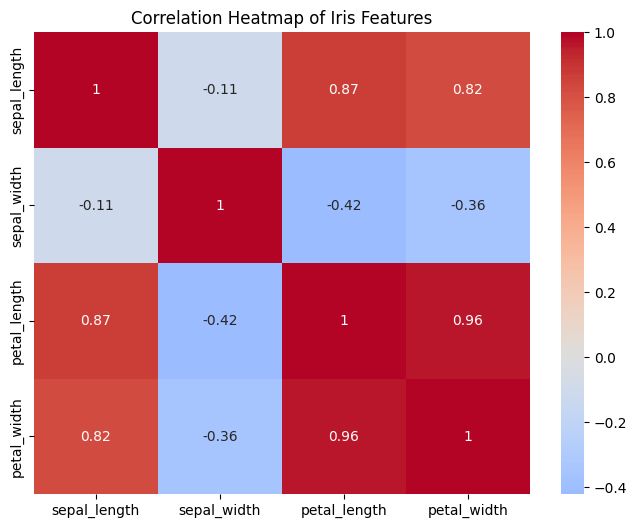

In [180]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
# Calculate the correlation matrix:
# - We first drop the 'class' (or 'species') column because it's categorical
# - .corr() calculates how strongly each feature is related to the others
corr = iris_data.drop('class', axis=1).corr()
# Create the heatmap:
# - 'corr' is the data to plot
# - annot=True adds the actual correlation values on the heatmap
# - cmap='coolwarm' sets the color scheme from cool (blue) to warm (red)
# - center=0 makes 0 correlation show as the middle color
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

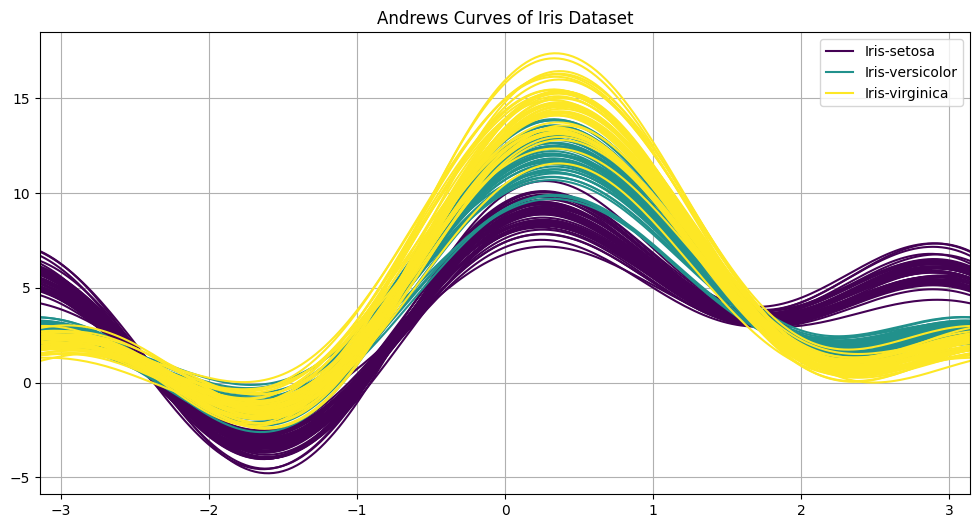

In [181]:
#Andrews Curves of Iris Dataset
# Andrews curves are a way to visualize high-dimensional data by transforming each data point into a continuous function.
plt.figure(figsize=(12, 6))
# Plot Andrews Curves:
# - iris_data: the full dataset
# - 'class': the column used to group data by color (use 'species' if using seaborn's dataset)
# - colormap: 'viridis' is a color map that provides a smooth color gradient
andrews_curves(iris_data, 'class', colormap='viridis')
plt.title('Andrews Curves of Iris Dataset')
plt.show()

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #30% dataset is for testing and 70% for training
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors is the number of neighbors to consider for classification

In [183]:
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors is the number of neighbors to consider
knn.fit(X_train, y_train) #fit the model on training data

KNeighborsClassifier(n_neighbors=3)

In [184]:
y_pred = knn.predict(X_test) #predict the class for test data to evaluate our model

In [185]:
print("Accuracy:", accuracy_score(y_test, y_pred)) #accuracy score of the model

Accuracy: 1.0


In [186]:
print(classification_report(y_test, y_pred)) #gives precision,recall,f1-score

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [187]:
X_test.head(2) #to see the first 2 rows of test data

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [188]:
new_data = [[6.7, 6.5, 3.4, 2.9]] #new data to predict

In [189]:
prediction = knn.predict(new_data) #predict the class for new data

c:\Users\Elrhea\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [190]:
prediction[0]

'Iris-virginica'

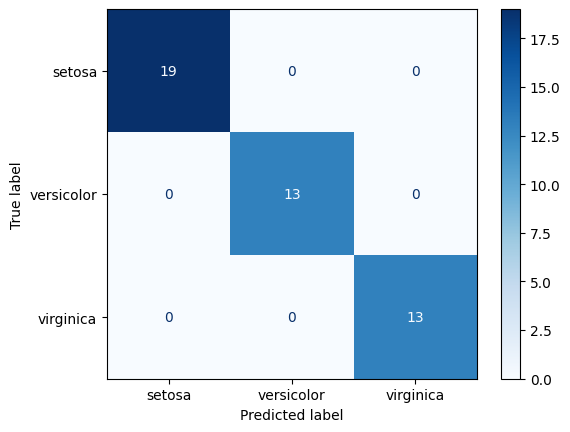

In [191]:
#Confusion Matrix
iris = load_iris() #A confusion matrix is a table used to evaluate the performance of a classification model.
#It shows how many predictions your model got right and wrong, by comparing the actual labels with the predicted labels.
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues', values_format='d')


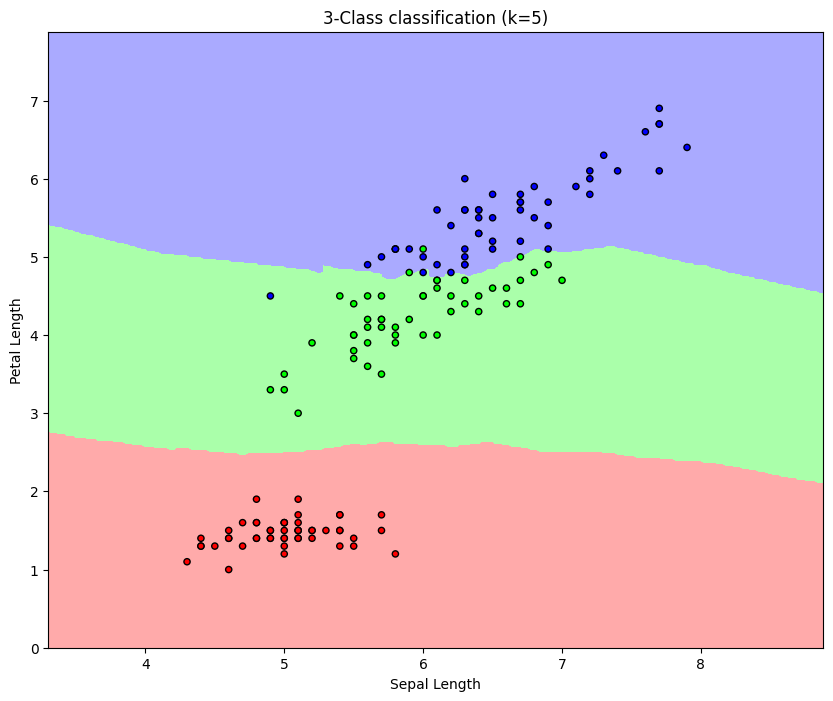

In [192]:
#Decision Boundary Visualization
iris_data.columns = [col.replace(' (cm)', '').replace(' ', '_') for col in iris_data.columns]

iris_data['class'] = iris.target_names[iris.target]
# We'll use just two features for visualization
X = iris_data[['sepal_length', 'petal_length']].values
y = iris_data['class'].astype('category').cat.codes.values

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k=5)")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

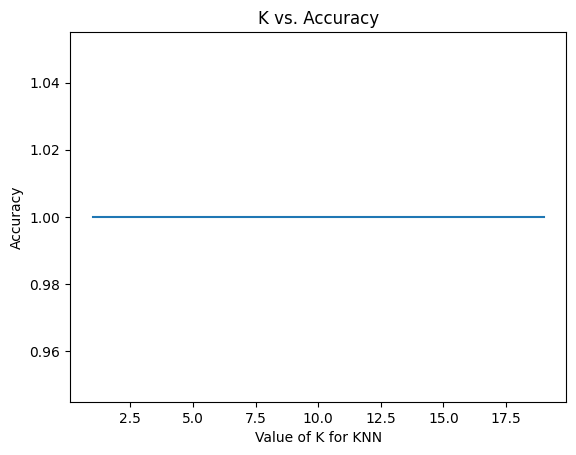

In [193]:
#Acuracy Score vs. k plot
scores = []
k_range = range(1, 20)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('K vs. Accuracy')
plt.show()

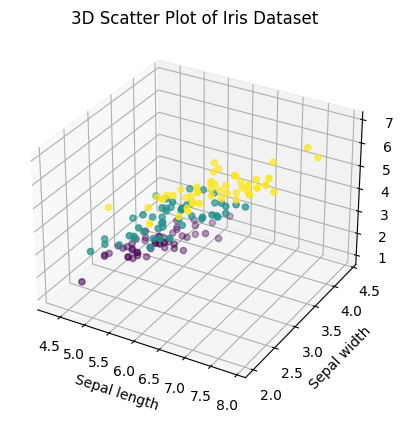

In [194]:
#3D Scatter Plot of Iris Dataset
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=iris.target, cmap='viridis')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.title("3D Scatter Plot of Iris Dataset")
plt.show()
